# About

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

The original dataset can be found here. The creators would like to note that in case you find the dataset useful, please make a reference to previous paper and the web page: http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/ in your papers, research, etc.

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk, sys

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#dropping the unsed empty columns
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis =1,inplace=True)

In [5]:
df.rename(columns={'v1':'label','v2':'text'},inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label    5572 non-null object
text     5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [7]:
# convert label to a numerical variable
df['label_num'] = df.label.map({'ham':0, 'spam':1})

In [8]:
# Number of words in each sentence
df['count']=0
for i in np.arange(0,len(df)):
    df.loc[i,'count'] = len(df.loc[i,'text'])

In [9]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [10]:
df.head()

,label,text,label_num,count
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [11]:
# Message length Count values
ham_df = df[df['label_num']==0]
ham_count  = pd.DataFrame(pd.value_counts(ham_df['count'],sort=True).sort_index())
print('Number of ham counts for the message lengths:',ham_count['count'].count())

spam_df = df[df['label_num']==1]
spam_count = pd.DataFrame(pd.value_counts(spam_df['count'],sort=True).sort_index())
print('Number of spam counts for the message lengths:',spam_count['count'].count())

Number of ham counts for the message lengths: 272
Number of spam counts for the message lengths: 122


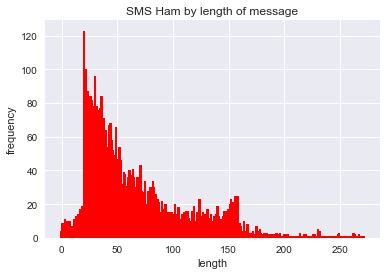

In [12]:
ax = plt.axes()
xline_ham = np.linspace(0, len(ham_count) - 1, len(ham_count))
ax.bar(xline_ham, ham_count['count'], width=2.2, color='r')
ax.set_title('SMS Ham by length of message')
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

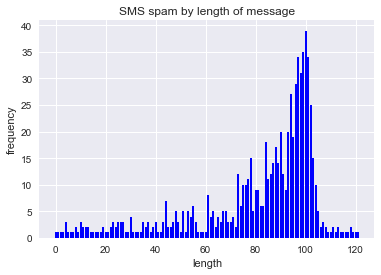

In [13]:
ax = plt.axes()
xline_ham = np.linspace(0, len(spam_count) - 1, len(spam_count))
ax.bar(xline_ham, spam_count['count'], width=0.75, color='b')
ax.set_title('SMS spam by length of message')
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

# Observation:
From the above two graps:
-->Ham graph follows 'Right skewed distibution' and also it has more number of observations with length of text 'less' than 100
-->Spam graph follows 'Left skewed distribution' and also it has more number of observations with length of text 'greater' than 100

# Preparing Data

In [48]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#if true it will download all the stopwords
if False:
    nltk.download('stopwords')

#if true will create vectorizer without any stopwords
if False:
    vectorizer = TfidfVectorizer()

#if true will create vectorizer with stopwords
if True:
    stopset = set(stopwords.words("english"))
    vectorizer = TfidfVectorizer(stop_words=stopset,binary=True)

In [51]:
x = vectorizer.fit_transform(df.text)
y = df.label_num

In [55]:
#Shuffle and split the dataset into the number of training and testing points
if True: 
    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, train_size=0.80, random_state=12)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

C:\Users\srikanth\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Training set has 4457 samples.
Testing set has 1115 samples.


#  Building Models: 

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
objects = ('LR','Multi-NB','KNN','RF','AdaB')

In [82]:
# function to train classifier
def train_classifier(clf, X_train, y_train):    
    clf.fit(X_train, y_train)

# function to predict features 
def predict_labels(clf, features):
    return (clf.predict(features))

In [83]:
# Initialize the three models
A = LogisticRegression()
B = MultinomialNB()
C = KNeighborsClassifier(n_neighbors=5)
D = RandomForestClassifier()
E = AdaBoostClassifier()

In [91]:
# loop to call function for each model
clf = [A,B,C,D,E]
pred_val = [0,0,0,0,0]
y_pred = dict()
for a in range(0,5):
    train_classifier(clf[a], X_train, y_train)
    y_pred[objects[a]] = predict_labels(clf[a],X_test)
    pred_val[a] = accuracy_score(y_test,y_pred[objects[a]]) 
    print ('Model name:',objects[a],'    Accuracy:',pred_val[a])

Model name: LR     Accuracy: 0.941704035874
Model name: Multi-NB     Accuracy: 0.962331838565
Model name: KNN     Accuracy: 0.902242152466
Model name: RF     Accuracy: 0.961434977578
Model name: AdaB     Accuracy: 0.965919282511


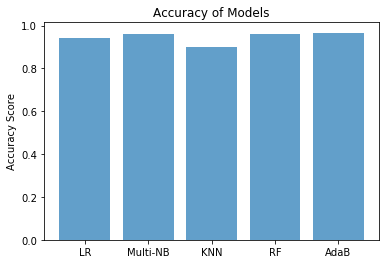

In [87]:
# ploating data for Accuracy
y_pos = np.arange(len(objects))
y_val = [ x for x in pred_val]
plt.bar(y_pos,y_val, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Models')
plt.show()

# Model Evaluation

In [95]:
print(classification_report(y_test,y_pred['Multi-NB'],target_names=['Ham','spam']))

             precision    recall  f1-score   support

        Ham       0.96      1.00      0.98       965
       spam       1.00      0.72      0.84       150

avg / total       0.96      0.96      0.96      1115



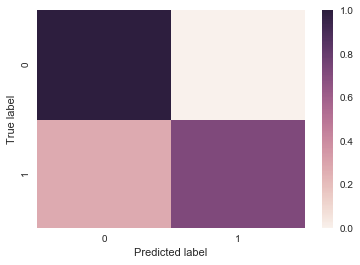

In [112]:
conf_mat = confusion_matrix(y_test, y_pred['Multi-NB'])
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [113]:
print(conf_mat)

[[965   0]
 [ 42 108]]
